<a href="https://colab.research.google.com/github/DawoodBhai420/Female-Age-Predictor/blob/main/Women_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18690  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11350  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5819  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:4

In [14]:
! kaggle datasets download -d pavelbiz/womens-faces-sorted-by-age-from-18-to-70-years-old

womens-faces-sorted-by-age-from-18-to-70-years-old.zip: Skipping, found more recently modified local copy (use --force to force download)


In [15]:
import os
import zipfile

local_zip = '/content/womens-faces-sorted-by-age-from-18-to-70-years-old.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./womens-faces-sorted-by-age-from-18-to-70-years-old')

zip_ref.close()

In [16]:
train_path = '/content/womens-faces-sorted-by-age-from-18-to-70-years-old/train'
print(len(os.listdir(train_path)))

53


In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
datagen = ImageDataGenerator(rescale=1/255,
                             validation_split = 0.2,
                             zoom_range=(0.99,0.99),
                             dtype=tf.float32)
train_generator = datagen.flow_from_directory('/content/womens-faces-sorted-by-age-from-18-to-70-years-old/train',
                                              target_size = (150,150),
                                              batch_size = 256,
                                              class_mode = "categorical",
                                              color_mode = "rgb",
                                              shuffle = True,
                                              seed = 123,
                                              subset = "training")
validation_generator = datagen.flow_from_directory('/content/womens-faces-sorted-by-age-from-18-to-70-years-old/train',
                                                   target_size = (150,150),
                                                   batch_size = 8,
                                                   class_mode = "categorical",
                                                   color_mode = "rgb",
                                                   shuffle = True,
                                                   seed = 123,
                                                   subset = "validation")

Found 44732 images belonging to 53 classes.
Found 11159 images belonging to 53 classes.


In [19]:
classes = validation_generator.class_indices
classes

{'18': 0,
 '19': 1,
 '20': 2,
 '21': 3,
 '22': 4,
 '23': 5,
 '24': 6,
 '25': 7,
 '26': 8,
 '27': 9,
 '28': 10,
 '29': 11,
 '30': 12,
 '31': 13,
 '32': 14,
 '33': 15,
 '34': 16,
 '35': 17,
 '36': 18,
 '37': 19,
 '38': 20,
 '39': 21,
 '40': 22,
 '41': 23,
 '42': 24,
 '43': 25,
 '44': 26,
 '45': 27,
 '46': 28,
 '47': 29,
 '48': 30,
 '49': 31,
 '50': 32,
 '51': 33,
 '52': 34,
 '53': 35,
 '54': 36,
 '55': 37,
 '56': 38,
 '57': 39,
 '58': 40,
 '59': 41,
 '60': 42,
 '61': 43,
 '62': 44,
 '63': 45,
 '64': 46,
 '65': 47,
 '66': 48,
 '67': 49,
 '68': 50,
 '69': 51,
 '70': 52}

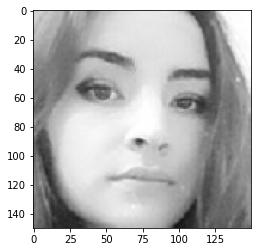

In [20]:
batch = next(train_generator)
plt.imshow(batch[0][0])

In [29]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(64, activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(1, activation='sigmoid')
])


In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 87616)             0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [31]:
history = model.fit(train_generator,
                    verbose=2,
                    epochs=5,
                    validation_data=validation_generator)

Epoch 1/5
175/175 - 310s - loss: 0.4790 - accuracy: 0.8139 - val_loss: 0.1360 - val_accuracy: 0.9811 - 310s/epoch - 2s/step
Epoch 2/5
175/175 - 308s - loss: 0.1516 - accuracy: 0.9727 - val_loss: 0.0990 - val_accuracy: 0.9811 - 308s/epoch - 2s/step
Epoch 3/5
175/175 - 313s - loss: 0.1102 - accuracy: 0.9798 - val_loss: 0.0969 - val_accuracy: 0.9811 - 313s/epoch - 2s/step
Epoch 4/5
175/175 - 318s - loss: 0.1060 - accuracy: 0.9801 - val_loss: 0.0972 - val_accuracy: 0.9811 - 318s/epoch - 2s/step
Epoch 5/5
175/175 - 317s - loss: 0.1045 - accuracy: 0.9803 - val_loss: 0.0961 - val_accuracy: 0.9811 - 317s/epoch - 2s/step


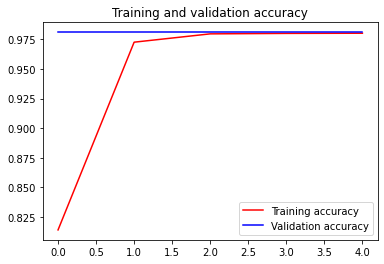

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

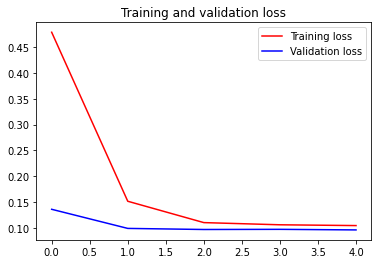

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()